In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)

import random

## 1-Defining Nodes

In [2]:
G = nx.Graph()
N = 50 # let's assume we only have 100 nodes in graph
nodes = [f'n{i+1}' for i in range(N)]


### Which `group` each node belongs to?

* Here I just used four categorical groups, but I think we should define them based on age, right? 
* We should use `Age specific population for Iran` to define probability of each group

In [3]:
available_groups  = ['home', 'work', 'school', 'other'] #any other groups?
group_popularrity = [0.3, 0.2, 0.15, 0.35] # made up values
node_group = {} # this will show which group each node belongs to

for i in range(N):
    r = random.random()
    if r < 0.3: node_group[f"n{i+1}"] = 'home'
    elif r < 0.5: node_group[f"n{i+1}"] = 'work'
    elif r < 0.65: node_group[f"n{i+1}"] = 'school'
    else: node_group[f"n{i+1}"] = 'other'

In [4]:
# let's see the number of nodes in each group:

group_count = {}
for n in node_group:
    if node_group[n] in group_count:
        group_count[node_group[n]] = group_count[node_group[n]] + 1
    else:
        group_count[node_group[n]] = 1
group_count

{'home': 18, 'other': 17, 'school': 9, 'work': 6}

## 2-Defining Connection Rules between Node Groups

### `We define rules in terms of connection probability between each two groups`

### I believe we should create `Age-specific contact matrices`, right?

In [5]:
# this is a completely made-up rule set: I defined a dictionary of rules. 

rules = {
    'home': {'home': 0.02, 'work': 0.015, 'school': 0.02, 'other': 0.01},
    'work': {'home': 0.015, 'work': 0.03, 'school': 0.005, 'other': 0.01},
    'school': {'home': 0.02, 'work': 0.005, 'school': 0.03, 'other': 0.01},
    'other': {'home': 0.01, 'work': 0.01, 'school': 0.01, 'other': 0.005}
}

In [6]:
edges = []
for i in range(N):
    for j in range(N):
        if i!=j:
            prob = rules[node_group[f"n{i+1}"]][node_group[f"n{j+1}"]]
            r = random.random()
            if r < prob:
                edges.append([f'n{i+1}', f'n{j+1}', r]) # first node, second node, random weight
            
with open('edges_naive_rules.csv', 'w') as writer:
    for e in edges:
        writer.write(f"{e[0]},{e[1]},{e[2]}\n")
    writer.close()

In [7]:
G=nx.read_weighted_edgelist(path='edges_naive_rules.csv', delimiter=',')
print ('number of nodes (with at least one connection):', G.number_of_nodes()) # I think it only returns # of nodes with at least one connection
print ('number of undirected edges:', G.number_of_edges())

number of nodes (with at least one connection): 39
number of undirected edges: 34


## 3- Visualization for `SMALL` graph

### ⚠️ Only for SMALL graphs (i.e. noes < 100)

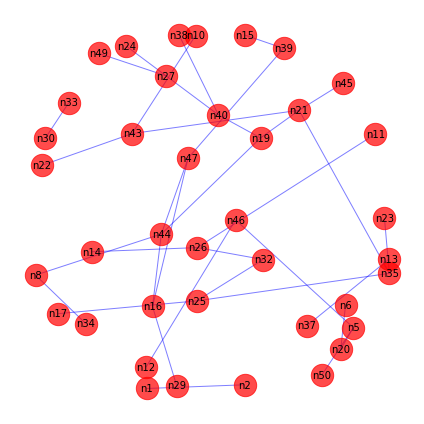

In [8]:
pos = nx.spring_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='red', alpha=0.7)

# edges
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, edge_color="b", style="-")

# labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

## 4-Defining Rules to Connecting Nodes and Adjusting `Probabilities/Distances`

* This would be the step that our Naive graph would evolve over the time through a simulation process

### `Example 1`: Add new connections

In [9]:
G.add_edge('n1', 'n5', weight=random.random())
G.add_edge('n1', 'n25', weight=random.random())

### `Example 2`: Remove an existing connection

In [10]:
existing_edges = list(G.edges)[0]
print (f'We remove edge {existing_edges[0]}-{existing_edges[1]}')
G.remove_edge(existing_edges[0], existing_edges[1])

We remove edge n1-n2


### `Example 3`: Update weight of an existing connection

In [11]:
existing_edges = list(G.edges)[-1]
print (f'We update weight of edge {existing_edges[0]}-{existing_edges[1]}')
G.remove_edge(existing_edges[0], existing_edges[1])
G.add_edge(existing_edges[0], existing_edges[1], weight=random.random())

We update weight of edge n49-n27


### Visualize the graph after the updates

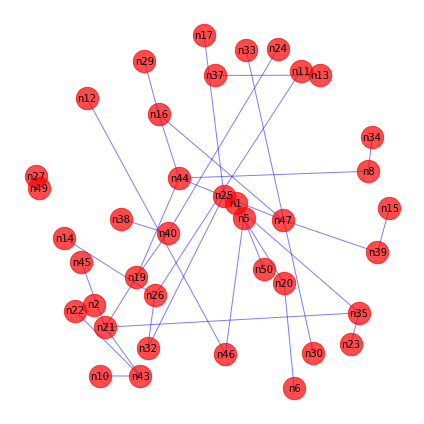

In [12]:
pos = nx.spring_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='red', alpha=0.7)

# edges
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, edge_color="b", style="-")

# labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()